In [1]:
import numpy as np
from sklearn import datasets
np.set_printoptions(threshold=np.inf)
mydigits = datasets.load_digits()
X = mydigits.data
y = mydigits.target

note:   
In the early sections, we slove “Two classification problem”（Distinguish which numbers are 9, and which numbers are not 9）       
There, we slove “Multi-classification problem”（Identification number 1-9）    


“sklearn.linear_model.LogisticRegression” can slove multi-classification problem naturally with "OVR"

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)
logReg = LogisticRegression()
logReg.fit(X_train, y_train)
y_predict = logReg.predict(X_test)

In [3]:
from sklearn.metrics import precision_score
precision_score(y_test, y_predict)

ValueError: Target is multiclass but average='binary'. Please choose another average setting.

According "ValueError", we can konw that "average" seeting is wrong.    
check the document:average, default is "binary". This parameter is required for multiclass/multilabel targets(now, seeting average = "micro")

In [4]:
precision_score(y_test, y_predict, average="micro")

0.9555555555555556

same to recall_score

In [5]:
from sklearn.metrics import recall_score
recall_score(y_test, y_predict, average="micro")

0.9555555555555556

note : confusion_matrix can adopt to multi-calssification problem naturely.

In [7]:
from sklearn.metrics import confusion_matrix
cmp = confusion_matrix(y_test, y_predict)
cmp

array([[45,  0,  0,  0,  0,  1,  0,  0,  0,  0],
       [ 0, 37,  0,  0,  0,  0,  0,  0,  3,  0],
       [ 0,  0, 49,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 49,  0,  1,  0,  0,  3,  0],
       [ 0,  1,  0,  0, 47,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  1,  0, 36,  0,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  1, 38,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 42,  0,  1],
       [ 0,  2,  0,  0,  0,  0,  0,  0, 46,  0],
       [ 0,  1,  0,  1,  1,  1,  0,  0,  0, 41]])

# draw confusion_matrix

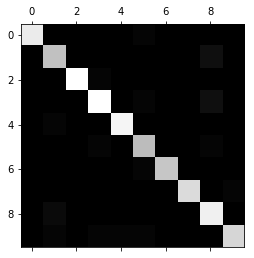

In [13]:
import matplotlib.pyplot as plt
plt.matshow(cmp, cmap=plt.cm.gray)

The larger the value of a position, the brighter the color       
preference： https://matplotlib.org/gallery/subplots_axes_and_figures/subplots_adjust.html#sphx-glr-gallery-subplots-axes-and-figures-subplots-adjust-py

The purpose of drawing confusion_matrix is to find error position.       
Now, we deal with the confusion_matrix

In [21]:
# Sum by row
row_sum = np.sum(cmp, axis=1)

In [22]:
cmp1 = cmp/row_sum

In [23]:
# Let the element of the diagonal position be 0，because the element of the diagonal position is right-predict
# we now want to find error position
np.fill_diagonal(cmp1, 0)
cmp1

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.02631579, 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.0625    , 0.        ],
       [0.        , 0.        , 0.        , 0.01886792, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.02631579, 0.        , 0.        , 0.0625    , 0.        ],
       [0.        , 0.025     , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.01886792, 0.        ,
        0.        , 0.        , 0.        , 0.02083333, 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.02631579, 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.       

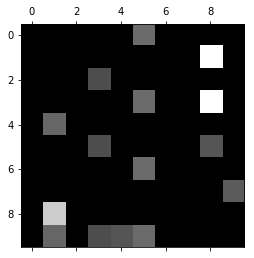

In [24]:
# draw 
plt.matshow(cmp1, cmap=plt.cm.gray)

We can find 1&8, 3&8 are easier confusion.      
1.we can check algorithm, adopt the threshold in 1&8 and 3&8.      
2.we can check original data to new discovery.